In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

In [4]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

--2024-04-06 10:40:11--  https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8804 (8.6K) [text/plain]
Saving to: ‘slimmed_realestate_data.csv’

slimmed_realestate_ 100%[===================>]   8.60K  --.-KB/s    in 0s      

2024-04-06 10:40:11 (61.2 MB/s) - ‘slimmed_realestate_data.csv’ saved [8804/8804]

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


In [14]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

def model(x,m,b):
   return m * x + b

def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

In [21]:
len(data)

551

In [9]:
batch_size=512
data_batch = data.sample(batch_size)


In [ ]:
for batch_size in [32, 64, 128, 256, 512]:

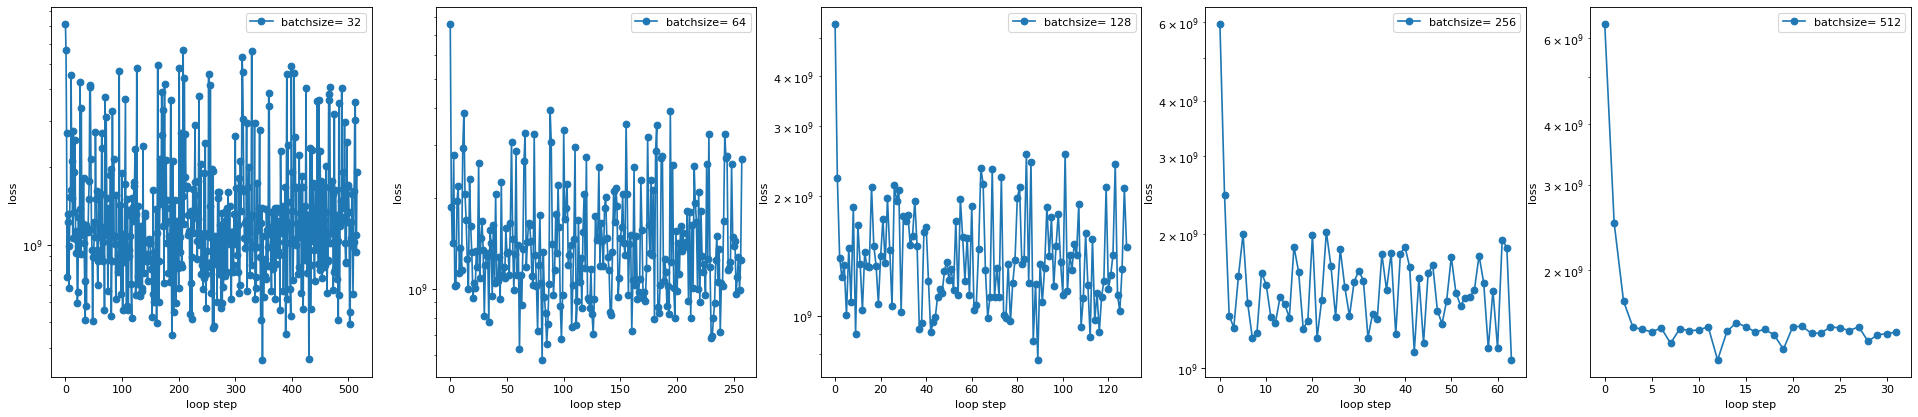

In [65]:
fig,ax = plt.subplots(1,5,figsize=(30,6),dpi=80)
for i in range(5):
  ax[i].set_yscale('log')
  ax[i].set_xlabel('loop step')
  ax[i].set_ylabel('loss')
  k=0
for batch_size in [32, 64, 128, 256, 512]:
  m = 5.
  b = 1000.
  learning_rate_m = 1e-7
  learning_rate_b = 1e-1
  loss_history = []
  loop_N = 30*len(data)//batch_size
  for i in range(loop_N):
    data_batch = data.sample(batch_size)
    data_x = data_batch['GrLivArea'].to_numpy()
    data_y = data_batch['SalePrice'].to_numpy()
    m = updated_m(data_x,data_y,m,b,learning_rate_m)
    b = updated_b(data_x,data_y,m,b,learning_rate_b)
    loss_value = np.mean(loss(data_x,data_y,m,b))
    loss_history.append(loss_value)
  loss_x = np.arange(0,len(loss_history))
  loss_y = np.asarray(loss_history)
  ax[k].plot(loss_x,loss_y, 'o-',label="batchsize= %.d"%(batch_size))
  ax[k].legend()
  k+=1
